<a href="https://colab.research.google.com/github/keethu12345/Kubernetes_ML-Model/blob/main/Kubernetes_Text_Generation_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data sources identified are the Kubernetes documentation available in https://kubernetes.io/docs/home/.

We shall be performing some web scraping over this data and preprocess it for traning using Hugging Face transformers. The dataset will be uploaded to Hugging Face hub as well.

1) The first task would be web scraping of the data.

2) The second task would be pre-processing the data.

After this we shall be fine tuning GPT model over the Kubernetes dataset to generate texts.

3) Fine tuning GPT model over Kubernetes Dataset.

### Task 1: Web scraping:

For the web scraping purposes we shall be using the Python libraries beautifulsoup4 and requests libraries:

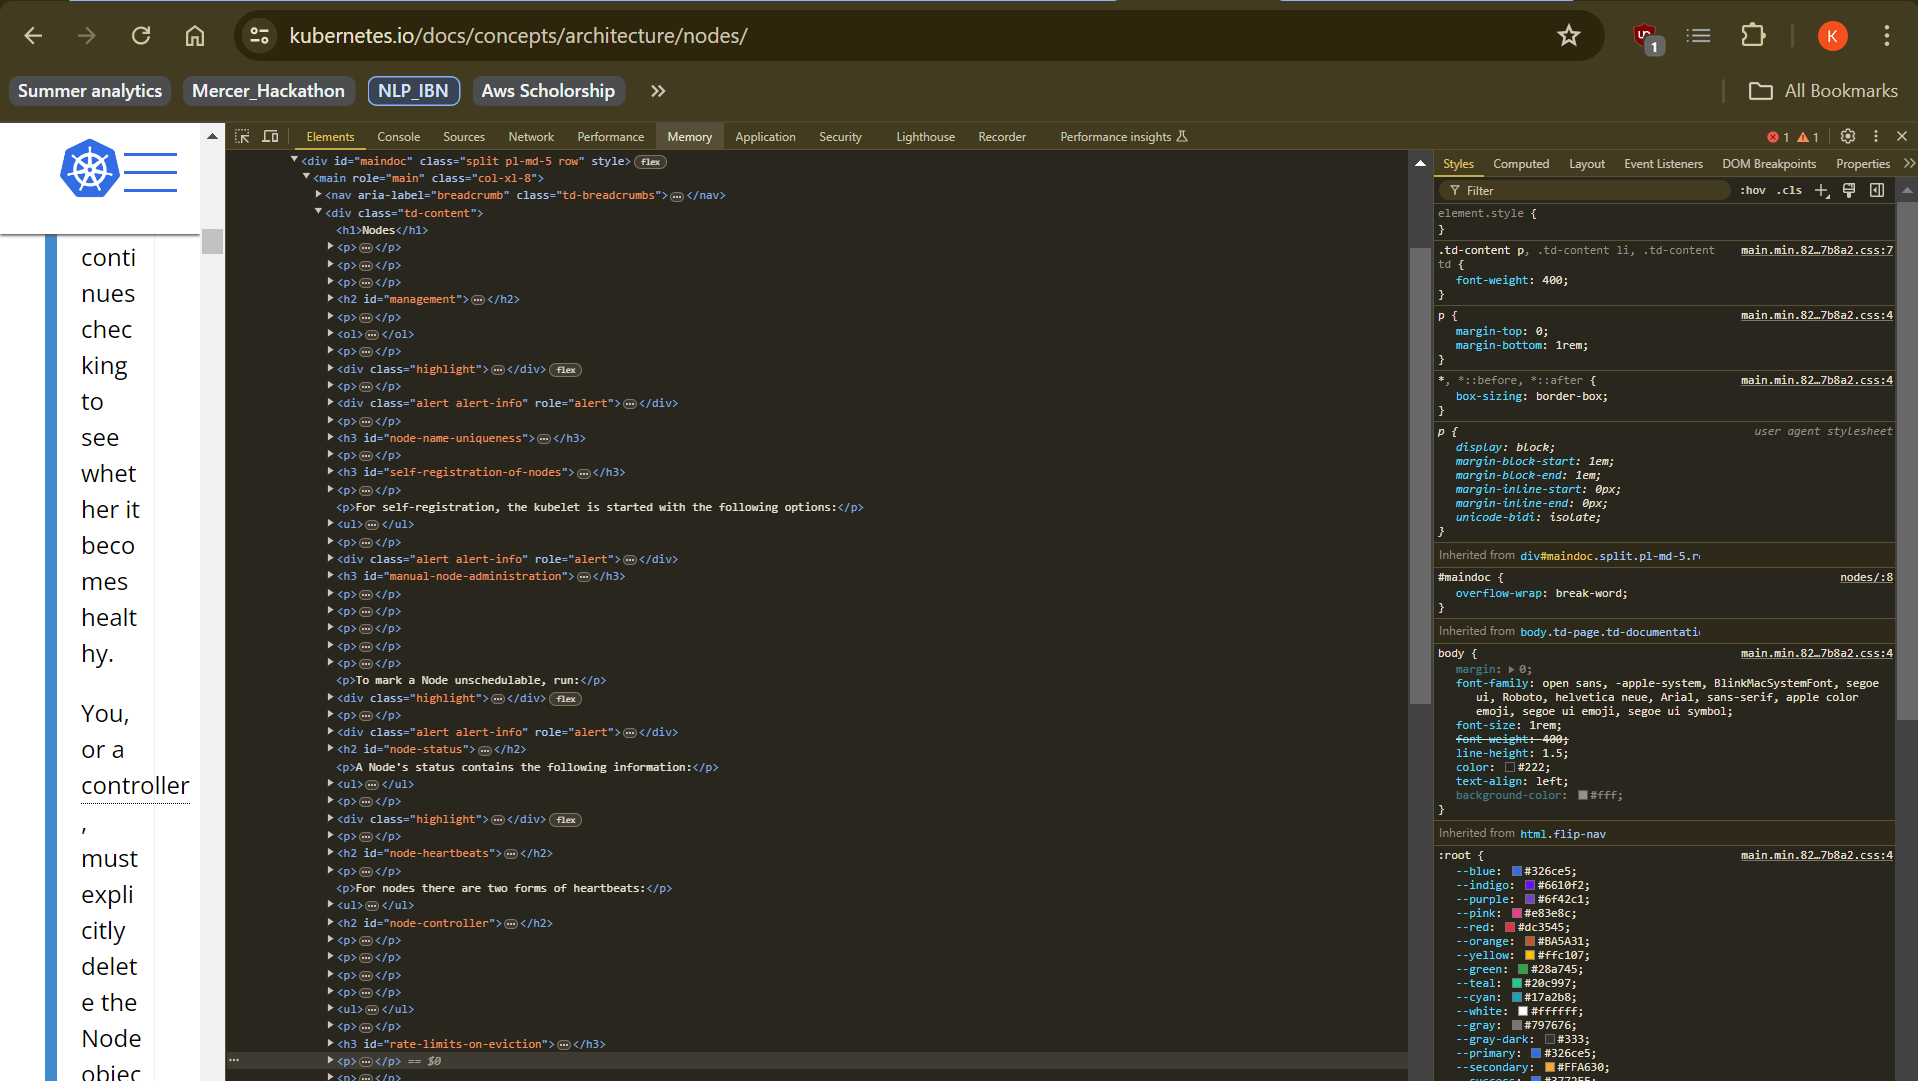

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_kubernetes_docs(url):
    try:

        response = requests.get(url)
        response.raise_for_status()
        html_content = response.text


        soup = BeautifulSoup(html_content, 'html.parser')


        sections = soup.find_all('div', class_='td-content') or soup.find_all('article')

        if not sections:
            raise ValueError("No content sections found on the page")


        text_data = []
        for section in sections:

            cleaned_text = re.sub(r'<.*?>', '', section.get_text())
            cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  #
            text_data.append(cleaned_text)

        return text_data

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
    except ValueError as ve:
        print(f"Error: {ve}")

    return None


kubernetes_docs_urls = [
    'https://kubernetes.io/docs/concepts/services-networking/',
    'https://kubernetes.io/docs/concepts/services-networking/service/',
    'https://kubernetes.io/docs/concepts/services-networking/ingress/',
    'https://kubernetes.io/docs/concepts/services-networking/ingress-controllers/',
    'https://kubernetes.io/docs/concepts/services-networking/gateway/',
    'https://kubernetes.io/docs/concepts/services-networking/endpoint-slices/',
    'https://kubernetes.io/docs/concepts/services-networking/network-policies/',
    'https://kubernetes.io/docs/concepts/services-networking/dns-pod-service/',
    'https://kubernetes.io/docs/concepts/services-networking/dual-stack/',
    'https://kubernetes.io/docs/concepts/services-networking/topology-aware-routing/',
    'https://kubernetes.io/docs/concepts/services-networking/windows-networking/',
    'https://kubernetes.io/docs/concepts/services-networking/cluster-ip-allocation/',
    'https://kubernetes.io/docs/concepts/services-networking/service-traffic-policy/',

]


all_kubernetes_text_data = []
for url in kubernetes_docs_urls:
    text_data = scrape_kubernetes_docs(url)
    if text_data:
        all_kubernetes_text_data.extend(text_data)


combined_kubernetes_text = "\n\n".join(all_kubernetes_text_data)


if all_kubernetes_text_data:
    print("Successfully scraped data from the following URLs:")
    for url in kubernetes_docs_urls:
        print(f" - {url}")
    print("\nSample of combined text data:\n")
    print(combined_kubernetes_text[:1000])
else:
    print("No data scraped. Check your scraping function and the URLs.")


with open('kubernetes_docs.txt', 'w', encoding='utf-8') as file:
    file.write(combined_kubernetes_text)

Successfully scraped data from the following URLs:
 - https://kubernetes.io/docs/concepts/services-networking/
 - https://kubernetes.io/docs/concepts/services-networking/service/
 - https://kubernetes.io/docs/concepts/services-networking/ingress/
 - https://kubernetes.io/docs/concepts/services-networking/ingress-controllers/
 - https://kubernetes.io/docs/concepts/services-networking/gateway/
 - https://kubernetes.io/docs/concepts/services-networking/endpoint-slices/
 - https://kubernetes.io/docs/concepts/services-networking/network-policies/
 - https://kubernetes.io/docs/concepts/services-networking/dns-pod-service/
 - https://kubernetes.io/docs/concepts/services-networking/dual-stack/
 - https://kubernetes.io/docs/concepts/services-networking/topology-aware-routing/
 - https://kubernetes.io/docs/concepts/services-networking/windows-networking/
 - https://kubernetes.io/docs/concepts/services-networking/cluster-ip-allocation/
 - https://kubernetes.io/docs/concepts/services-networking/se

The combined_kebernetes_text file contains the data we have scraped from the kubernetes documentation links as shown above.

In the further steps we shall be creating a dataset in the HuggingFace hub, and upload this data into the hub as shown below:

####Creation of the *kubernetes-documentation-dataset* Dataset:

In [ ]:
!pip install datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

!ls /content/kubernetes_docs.txt


/content/kubernetes_docs.txt


In [ ]:
import shutil


source_path = '/content/kubernetes_docs.txt'
destination_path = '/content/drive/MyDrive/kubernetes_docs.txt'


shutil.copy(source_path, destination_path)


'/content/drive/MyDrive/kubernetes_docs.txt'

In [ ]:
import os
import json


dataset_dir = '/content/kubernetes_dataset'
os.makedirs(dataset_dir, exist_ok=True)


!cp /content/kubernetes_docs.txt /content/drive/MyDrive/kubernetes_docs.txt


dataset_config = {
    "name": "kubernetes_documentation",
    "description": "Text data extracted from Kubernetes documentation pages.",
    "license": "CC-BY-SA-4.0",
    "tags": ["kubernetes", "documentation", "text"],
    "language": "en",
    "homepage": "https://example.com/dataset/kubernetes_documentation",
    "citation": "Keerthika, Kubernetes Data, 2024.",
    "version": "1.0.0"
}


config_file_path = os.path.join(dataset_dir, 'dataset_config.json')
with open(config_file_path, 'w') as f:
    json.dump(dataset_config, f, indent=4)




In [ ]:
from datasets import Dataset, DatasetDict


dataset = Dataset.from_dict({"text": [combined_kubernetes_text]})


repo_name = "kubernetes-documentation-dataset"


dataset.push_to_hub(repo_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/keethu/kubernetes-documentation-dataset/commit/01dd5fa5177a4765ce6c567c6272bdcd60a0bd09', commit_message='Upload dataset', commit_description='', oid='01dd5fa5177a4765ce6c567c6272bdcd60a0bd09', pr_url=None, pr_revision=None, pr_num=None)

Hence with the above codes we have successfully created the dataset, and now we shall be able to view the dataset created in the HuggingFace hub.

Now that we have our Dataset ready, we shall perform some pre-processing over this Dataset.

###Task 2: Pre-processing the Data:

In [ ]:
!pip install transformers datasets torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import GPT2Tokenizer
from datasets import Dataset
import torch


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})


file_path = '/content/kubernetes_dataset/kubernetes_docs.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()


text_chunks = text_data.split('\n\n')


tokenized_data = tokenizer(text_chunks, truncation=True, padding='max_length', max_length=512)



In [ ]:

dataset = Dataset.from_dict({
    'input_ids': input_ids,
    'attention_mask': attention_mask
})


print(dataset)


Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 1
})


###Task 3: Fine-tuning our data on the gpt2 model:

I initially started with the dataset pre-processing from scratch tho I had dataset updated in my hub, however I wasn't succesfull in doing so and hence I have loaded the dataset from the hub and fine tuned it on GPT.

Method 1: Pre-processing and creation of Dataset from scratch.

Method 2: Using Dataset I had loaded into the HF hub.

####Method 1: Pre-processing and creation of Dataset from scratch.

In [ ]:
print(dataset)

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 1
})


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling


model = GPT2LMHeadModel.from_pretrained('gpt2')


data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)


training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=5_000,
    save_total_limit=2,
    logging_dir='./logs',
    logging_steps=100,
)

In [ ]:
dataset['input_ids'][0], dataset['attention_mask'][0]

([36674,
  2420,
  422,
  12554,
  527,
  3262,
  274,
  10314,
  13,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  50257,
  5

In [ ]:
from transformers import Trainer


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    data_collator=data_collator
)


try:
    trainer.train()
except Exception as e:
    print(f"Error during training: {e}")
    # Optionally, inspect the dataset sample for debugging
    print("Sample input_ids:", dataset['input_ids'][0])
    print("Sample attention_mask:", dataset['attention_mask'][0])



Error during training: index out of range in self
Sample input_ids: [36674, 2420, 422, 12554, 527, 3262, 274, 10314, 13, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 5025

Since I have recieved an error, I shall try loading the dataset from HF hub and use it to fine tune.

####Method 2: Using Dataset I had loaded into the HF hub.

In [ ]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling


ds = load_dataset("keethu/kubernetes-documentation-dataset")


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

tokenized_datasets = ds.map(tokenize_function, batched=True)


model = GPT2LMHeadModel.from_pretrained('gpt2')

training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=4,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=100,
    save_steps=500,
    eval_strategy="no",
)



In [ ]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    data_collator=DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False),
)

trainer.train()

Step,Training Loss


TrainOutput(global_step=3, training_loss=3.4602108001708984, metrics={'train_runtime': 83.5107, 'train_samples_per_second': 0.036, 'train_steps_per_second': 0.036, 'total_flos': 1567752192000.0, 'train_loss': 3.4602108001708984, 'epoch': 3.0})

In [52]:
trainer.save_model('keethu/results')


In [53]:
trainer.push_to_hub('results')


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/keethu/results/commit/3f45153ea192d93844d9aafb6204aee2a05f2da9', commit_message='results', commit_description='', oid='3f45153ea192d93844d9aafb6204aee2a05f2da9', pr_url=None, pr_revision=None, pr_num=None)